In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit


In [75]:
df = pd.read_excel(r'/Users/anastasiailina/Desktop/jupiter/NKR10RT.xls')
#для mac (r'/Users/anastasiailina/Desktop/jupiter/NKR3RT.xls')
#для huawei (r'C:\NKR_PPMS.xls')

In [6]:
x = np.random.rand(50)*2000


In [7]:
y = np.random.rand(50)*2000

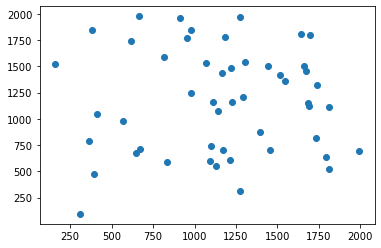

In [8]:
plt.scatter(x,y)

In [76]:
data = df.copy()

cols = ["T", "R"]
data.columns = ["T", "R"]
data_ = data.copy()
data_.head()

,T,R
0,NaN,NaN
1,4.20959,0.00060
2,4.36283,0.00115
3,4.51245,0.00033
4,4.67626,0.00061


In [77]:
T = np.array(data_["T"])
R = np.array(data_["R"])

In [78]:
T = T[~np.isnan(T)]
R = R[~np.isnan(R)]

1514


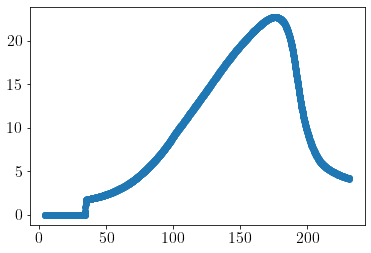

In [79]:
plt.scatter(T,R)
print(len(T))

In [80]:
T_ = np.delete(T, np.s_[0:212])
#T1 = np.delete(T_,np.s_[4703:5622])

In [81]:
print(len(T))

1514


In [82]:
R_ = np.delete(R, np.s_[0:212])
#R1 = np.delete(R_,np.s_[4703:5622])
R2 = R_/0.84507

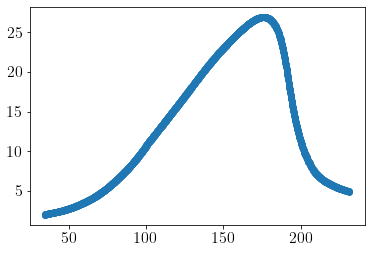

In [83]:
plt.scatter(T_,R2)

In [85]:

def Rmet(t,R0met,X,n):
    return 1/(R0met+X*t**n) 
#initial guess itaration process
#1 (0.892, 2*10**(-5), 2.79, 1.4*10**(-3), 3.05975869e+02, 0.1, 3.06022736e+02)
#2 (-2.29289970e-02,  1.21265789e-03,  1.97025527e+00,  3.69929223e-06, 5.33149044e+02, -7.69288686e-01,  1.51942876e+03)
#3 2.29306555e-02,  1.21266366e-03,  1.97025428e+00,  3.69916002e-06,5.33150253e+02, 7.69288686e-01,  1.51942876e+03
#4 -2.29543772e-02,  1.21269824e-03,  1.97024870e+00,  3.69897731e-06, 5.33151968e+02,  7.69288686e-01,  1.51942876e+03
#5 -2.29543772e-02,  1.21269824e-03,  1.97024870e+00,  3.69897731e-06, 5.33151968e+02,  -7.69288686e-01,  1.51942876e+03
#6 -2.29326679e-02,  1.21266635e-03,  1.97025385e+00,  3.69911258e-06, 5.33150683e+02, -7.69288686e-01,  1.51942876e+03

In [238]:
R0met = 0.892
X = 2*10**(-5)
n = 2.79
def Rsemi(t, R0semi,Eg):
    return 1/(R0semi*np.exp(Eg*5.8/t))

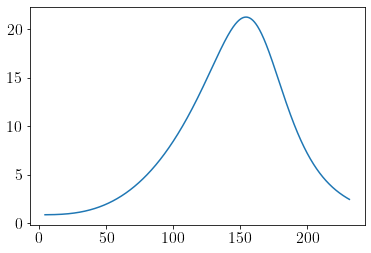

In [239]:
plt.plot(T, 1/(Rsemi(T, 1.4*10**(-3),300)+Rmet(T,R0met,X,n)+Rsemi(T,1*0.1,300)))

In [240]:
def func (x,a,b,c,d,e,f,g):
    return 1/(Rmet(x,a,b,c)+Rsemi(x,d,e)+Rsemi(x,f,g))

In [267]:
initial_guess = [-2.29543772e-02,  1.21269824e-03,  1.97024870e+00,  3.69897731e-06, 5.33151968e+02,  -7.69288686e-01,  1.51942876e+03] 

In [268]:
popt, pcov = curve_fit(func,T_,R2, p0=initial_guess)

print("Optimal parameters:", popt)

Optimal parameters: [-2.29326679e-02  1.21266635e-03  1.97025385e+00  3.69911258e-06
  5.33150683e+02 -7.69288686e-01  1.51942876e+03]


/Users/anastasiailina/opt/anaconda3/envs/coursera_ds/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


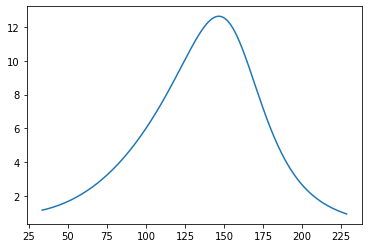

In [37]:
plt.plot(T_,func (T_,8.91844815e-01, 1.98205230e-05, 2.70572811e+00, 4.05039795e-04, 3.05975869e+02, 3.79708942e-01, 3.06022736e+02))

In [38]:
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage[utf8]{inputenc}')
rc('text.latex', preamble='\\usepackage[russian]{babel}')

<ipython-input-238-f77eeb359c12>:5: RuntimeWarning: overflow encountered in exp
  return 1/(R0semi*np.exp(Eg*5.8/t))


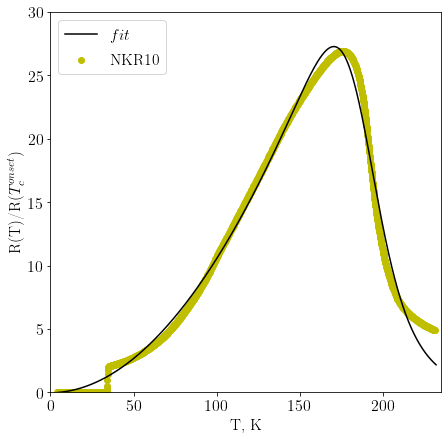

In [269]:
plt.figure(figsize=(7,7))
mpl.rcParams['font.size'] = 16
plt.ylabel("R(T)/R($T_c^{onset}$) ")
plt.xlabel("T, K")
x = np.linspace(4.2, 232,1513)
plt.ylim( 0, 30)
plt.xlim( 0, 235)

plt.scatter(T,R/0.84507, color="y", label="NKR10")
plt.plot(x,func(x,-2.29326679e-02,  1.21266635e-03,  1.97025385e+00,  3.69911258e-06, 5.33150683e+02, -7.69288686e-01,  1.51942876e+03), 'k', label="$fit$")

save_results_to = '/Users/anastasiailina/Desktop/jupiter/'
plt.legend()
plt.savefig(save_results_to + "NKR10.png", dpi = 300)
plt.legend()
plt.show()